# Question 1
## a.

In [1]:
using DataFrames
df = readtable("uy_data.csv",header=false)

INFO: Precompiling module DataFrames.


,x1,x2
1,-0.9188,-1.0773
2,-0.6159,-0.9419
3,0.1959,-0.0915
4,-0.0316,0.0245
5,-1.3455,-1.3239
6,-0.0513,-0.3536
7,0.1471,0.1032
8,-1.1615,-1.0702
9,0.5478,0.2722
10,0.6096,0.9127


In [22]:
y_vals = []
for val in df[:,2]
    append!(y_vals,val)
end
u_vals = []
for val in df[:1]
    append!(u_vals,val)
end
k=5

A_AR = zeros(length(y_vals),k)

for i in 1:k
    A_AR[i+1:end,i] = y_vals[1:end - i ]
end
wopt_ar = A\y_vals

A_MA = zeros(length(y_vals),k)
for i in 1:k
    A_MA[i:end,i] = u_vals[1:end-i + 1]
end

wopt_ma = A_MA\y_vals



5-element Array{Any,1}:
 1.1012    
 0.528947  
 0.262297  
 0.0521686 
 0.00421062

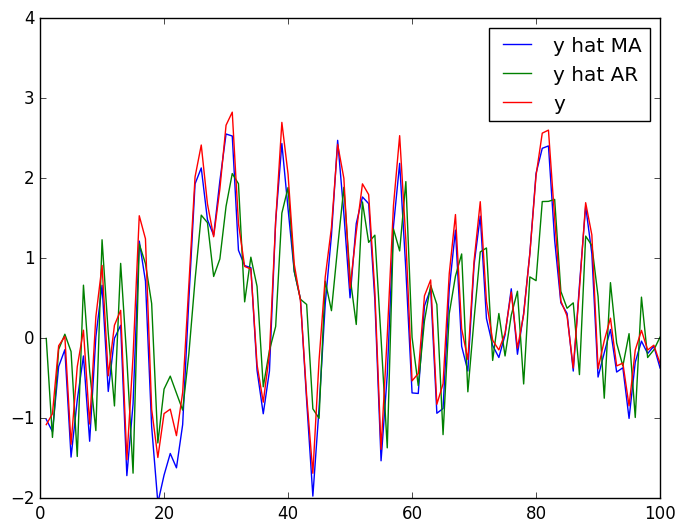

(-2,4)

In [30]:
using PyPlot
y_pred_ar = A_AR*wopt_ar
y_pred_ma = A_MA*wopt_ma
plot(1:length(y_pred_ma), y_pred_ma, label="y hat MA")
plot(1:length(y_pred_ar), y_pred_ar, label="y hat AR")
plot(1:length(y_vals), y_vals, label="y")
legend()
ylim(-2,4)

For MA $||y - \hat{y}||$ is equal to  

In [31]:
norm(y_vals - y_pred_ma)

2.460854388269911

for AR $||y - \hat{y}$ is equal to 

In [32]:
norm(y_vals - y_pred_ar)

7.436691765656793

## b.

In [51]:
A = zeros(length(y_vals), 2)
A[:,1] = u_vals[:]
A[2:end,2] = y_vals[1:end - 1]
wopt = A\y_vals

2-element Array{Any,1}:
 1.08444 
 0.485214

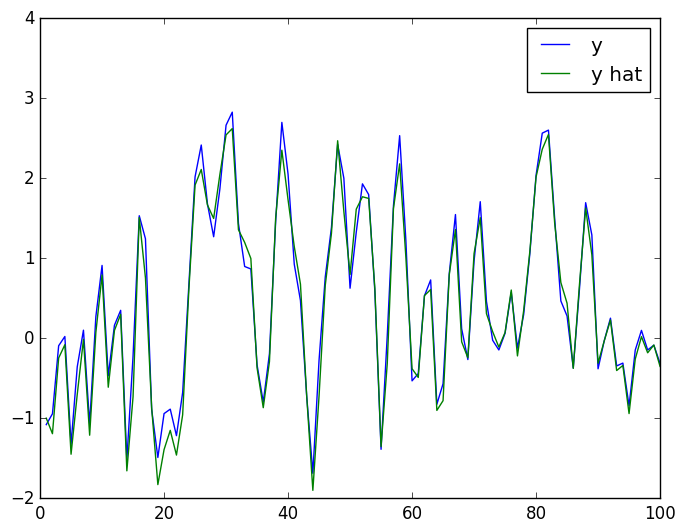

(-2,4)

In [55]:
plot(1:length(y_vals),y_vals, label="y")
plot(1:length(y_vals), A*wopt, label="y hat")
legend()
ylim(-2,4)

Here for ARMA $||y - \hat{y}||$ is equal to 

In [56]:
norm(y_vals - A*wopt)

1.8565828148734604